In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [59]:
def get_shift_matrix(x: float, y: float):
    return np.array([[1, 0, x], [0, 1, y], [0, 0, 1]])

In [62]:
def shift_points(x: float, y: float, points: np.ndarray):
    M = get_shift_matrix(x, y)
    homogenous_points = np.vstack((points, np.ones(points.shape[1])))
    return M @ homogenous_points

In [63]:
def plot_scene(object_points_1, object_points_2, box_1=False, box_2=False):
    plt.scatter(object_points_1[0, :], object_points_1[1, :], color='black')
    plt.scatter(object_points_2[0, :], object_points_2[1, :], color='black')

    for i in range(object_points_1.shape[1]):
        x1, y1 = object_points_1[:, i]
        x2, y2 = object_points_1[:, (i+1) % object_points_1.shape[1]]
        plt.plot([x1, x2], [y1, y2], c='b')

    for i in range(object_points_2.shape[1]):
        x1, y1 = object_points_2[:, i]
        x2, y2 = object_points_2[:, (i+1) % object_points_2.shape[1]]
        plt.plot([x1, x2], [y1, y2], c='r')

    if box_1:
        plt.hlines(y=np.min(object_points_1[1, :]), xmin=-4, xmax=4, color='blue', linestyle='--')
        plt.hlines(y=np.max(object_points_1[1, :]), xmin=-4, xmax=4, color='blue', linestyle='--')
        plt.vlines(x=np.min(object_points_1[0, :]), ymin=-4, ymax=4, color='blue', linestyle='--')
        plt.vlines(x=np.max(object_points_1[0, :]), ymin=-4, ymax=4, color='blue', linestyle='--')

    if box_2:
        plt.hlines(y=np.min(object_points_2[1, :]), xmin=-4, xmax=4, color='red', linestyle='--')
        plt.hlines(y=np.max(object_points_2[1, :]), xmin=-4, xmax=4, color='red', linestyle='--')
        plt.vlines(x=np.min(object_points_2[0, :]), ymin=-4, ymax=4, color='red', linestyle='--')
        plt.vlines(x=np.max(object_points_2[0, :]), ymin=-4, ymax=4, color='red', linestyle='--')
    
    plt.gca().set_xlim([-4, 4])
    plt.gca().set_ylim([-4, 4])

    plt.plot()

In [64]:
p1_o1 = np.array([0, 0])
p2_o1 = np.array([1.5, .5])
p3_o1 = np.array([3, 0])
p4_o1 = np.array([1.5, 2])

object_1 = np.vstack([p1_o1, p2_o1, p3_o1, p4_o1]).T
object_1

array([[0. , 1.5, 3. , 1.5],
       [0. , 0.5, 0. , 2. ]])

In [65]:
p1_o2 = np.array([-1, -1])
p2_o2 = np.array([-1.5, 0])
p3_o2 = np.array([-0.5, 1.5])
p4_o2 = np.array([1.5, 1])
p5_o2 = np.array([1, -0.5])


object_2 = np.vstack([p1_o2, p2_o2, p3_o2, p4_o2, p5_o2]).T
object_2

array([[-1. , -1.5, -0.5,  1.5,  1. ],
       [-1. ,  0. ,  1.5,  1. , -0.5]])

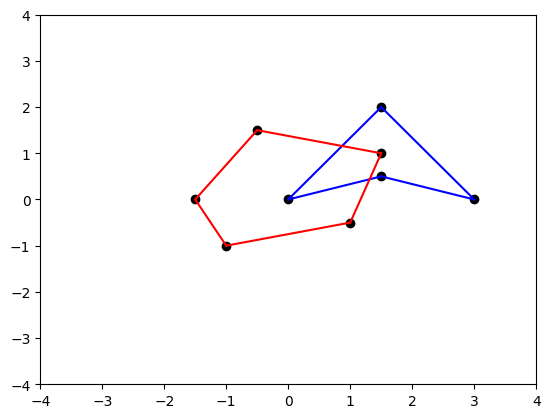

In [66]:
plot_scene(object_1, object_2, box_1=False, box_2=False)

# Get Box Values

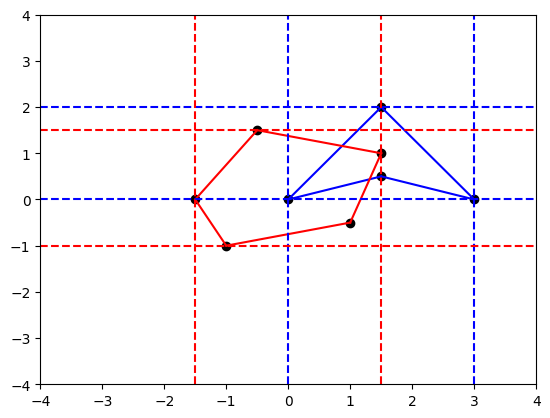

In [67]:
plot_scene(object_1, object_2, box_1=True, box_2=True)

In [68]:
def get_box_extremes(object_points):
    x_min = np.min(object_points[0, :])
    x_max = np.max(object_points[0, :])
    y_min = np.min(object_points[1, :])
    y_max = np.max(object_points[1, :])

    return x_min, x_max, y_min, y_max 

In [69]:
print(get_box_extremes(object_1))
print(get_box_extremes(object_2))

(np.float64(0.0), np.float64(3.0), np.float64(0.0), np.float64(2.0))
(np.float64(-1.5), np.float64(1.5), np.float64(-1.0), np.float64(1.5))


# Check if Boxes overlap

In [86]:
def do_object_boxes_overlap(object_points_1, object_points_2):
    x_min_box_1, x_max_box_1, y_min_box_1, y_max_box_1 = get_box_extremes(object_points_1)
    x_min_box_2, x_max_box_2, y_min_box_2, y_max_box_2 = get_box_extremes(object_points_2)

    to_the_left = x_min_box_1 > x_max_box_2
    to_the_right = x_max_box_1 < x_min_box_2
    above = y_max_box_1 < y_min_box_2
    below = y_min_box_1 > y_max_box_2

    return not (to_the_left or to_the_right or above or below)

Overlap: False


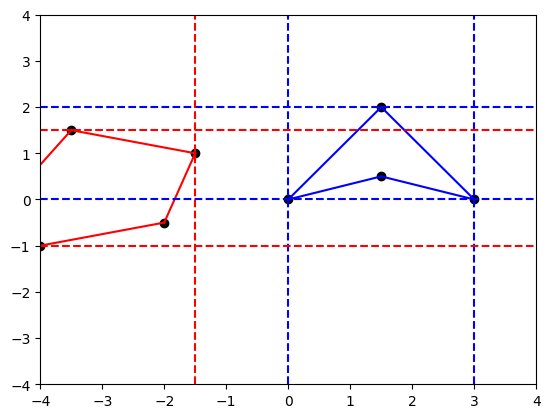

In [93]:
shifted_object_2 = shift_points(-3, 0, object_2)[0:2, :]
print('Overlap:', do_object_boxes_overlap(object_1, shifted_object_2))
plot_scene(object_1, shifted_object_2, box_1=True, box_2=True)

Overlap: False


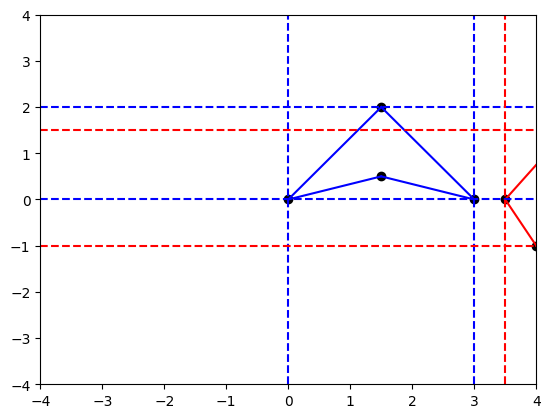

In [94]:
shifted_object_2 = shift_points(5, 0, object_2)[0:2, :]
print('Overlap:', do_object_boxes_overlap(object_1, shifted_object_2))
plot_scene(object_1, shifted_object_2, box_1=True, box_2=True)

Overlap: False


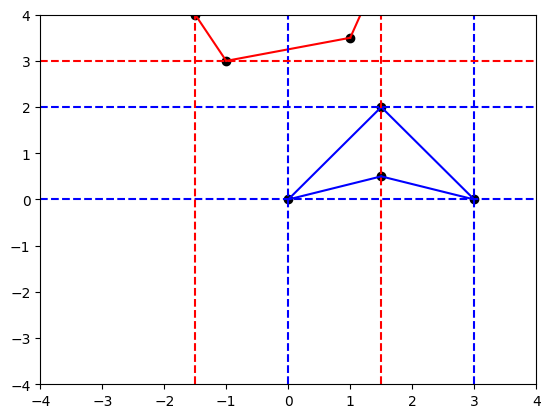

In [95]:
shifted_object_2 = shift_points(0, 4, object_2)[0:2, :]
print('Overlap:', do_object_boxes_overlap(object_1, shifted_object_2))
plot_scene(object_1, shifted_object_2, box_1=True, box_2=True)

Overlap: False


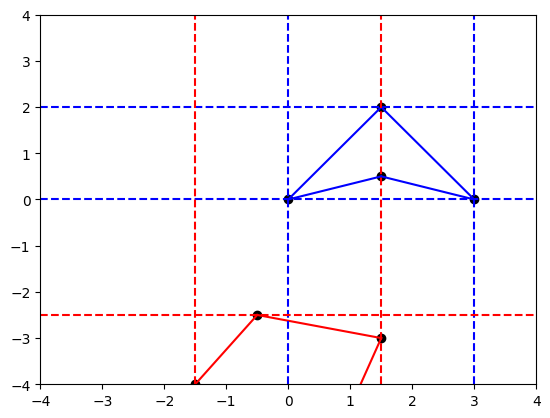

In [96]:
shifted_object_2 = shift_points(0, -4, object_2)[0:2, :]
print('Overlap:', do_object_boxes_overlap(object_1, shifted_object_2))
plot_scene(object_1, shifted_object_2, box_1=True, box_2=True)

Overlap: True


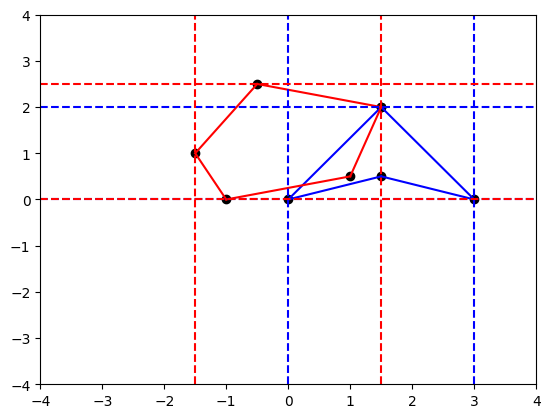

In [97]:
shifted_object_2 = shift_points(0, 1, object_2)[0:2, :]
print('Overlap:', do_object_boxes_overlap(object_1, shifted_object_2))
plot_scene(object_1, shifted_object_2, box_1=True, box_2=True)

# Ray-Trace Object Collision

In [98]:
def collision_ray_casting_with_edge_cases(object_points: np.ndarray, projectile: np.ndarray):
    # Check if Projectile out of the Box (x-Axis)
    if projectile[0] < np.min(object_points[0, :]) or projectile[0] > np.max(object_points[0, :]):
        return False
    # Check if Projectile out of the Box (y-Axis)
    if projectile[1] < np.min(object_points[1, :]) or projectile[1] > np.max(object_points[1, :]):
        return False

    # Loop through each Point of Object sequentually in order to get each Line
    intersection_flag = False
    for i in range(object_points.shape[1]):
        x1, y1 = object_points[:, i]
        x2, y2 = object_points[:, (i+1) % object_points.shape[1]]

        # Edge-Case (y1 = y2)
        if y1 == y2:
            if (min(x1, x2) <= projectile[0] and max(x1, x2) >= projectile[0]) and projectile[0] == y1:
                return True
            else:
                continue

        # Edge-Case (x1 = x2)
        if x1 == x2:
            if (projectile[1] <= max(y1, y2) and projectile[1] >= min(y1, y2)) and x1 >= projectile[0]:
                intersection_flag = not intersection_flag
                continue

        # Calculate Intersection Point of Line
        m = (y2 - y1) / (x2 - x1)
        t = y1 - m * x1
        x_intersection = (projectile[1] - t) / m

        # Check if Intersection Point is on Line and if only the Virtual Ray-Trace is only on theh right side of the Projectile
        if (min(x1, x2) <= x_intersection and max(x1, x2) >= x_intersection) and x_intersection >= projectile[0]:
            intersection_flag = not intersection_flag

    return intersection_flag

In [133]:
def object_collision(object_points_1, object_points_2):
    # Check if Boxes overlap
    if not do_object_boxes_overlap(object_points_1, object_points_2):
        return False

    # Check if a Point of Object-1 is withing Object-2
    for i in range(object_points_1.shape[1]):
        point = object_points_1[:, i]
        collision = collision_ray_casting_with_edge_cases(object_points_2, point)
        if collision:
            return True
        
    # Check if a Point of Object-2 is withing Object-1
    for i in range(object_points_2.shape[1]):
        point = object_points_2[:, i]
        collision = collision_ray_casting_with_edge_cases(object_points_1, point)
        if collision:
            return True

    return False

Collision: False
Duration: 0.00045680999755859375


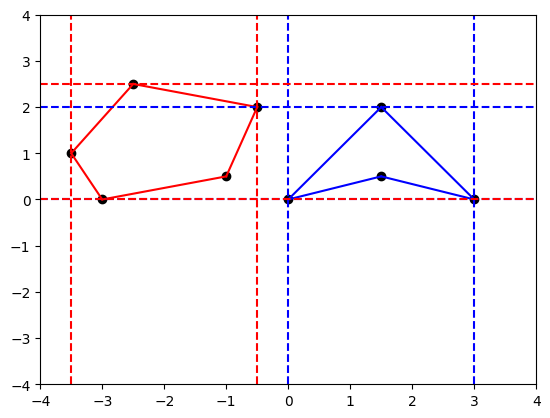

In [145]:
shifted_object_2 = shift_points(-2, 1, object_2)[0:2, :]
start = time.time()
print('Collision:', ray_cast_object_collision(object_1, shifted_object_2))
print('Duration:', time.time() - start)
plot_scene(object_1, shifted_object_2, box_1=True, box_2=True)

Collision: False
Duration: 0.0006320476531982422


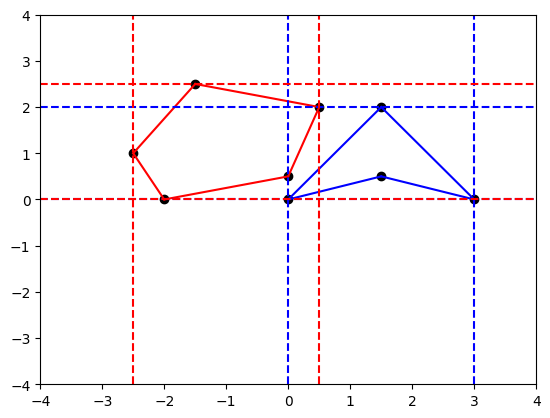

In [155]:
shifted_object_2 = shift_points(-1, 1, object_2)[0:2, :]
start = time.time()
print('Collision:', ray_cast_object_collision(object_1, shifted_object_2))
print('Duration:', time.time() - start)
plot_scene(object_1, shifted_object_2, box_1=True, box_2=True)

Collision: True
Duration: 0.0006074905395507812


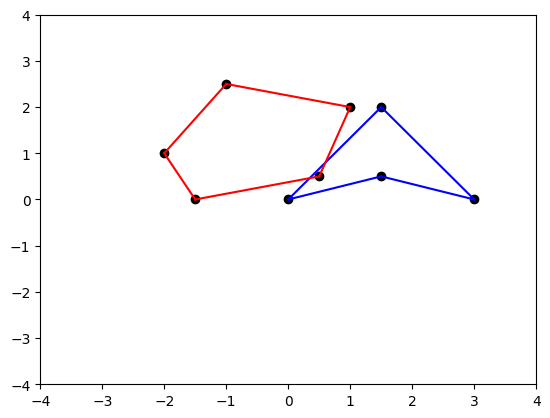

In [163]:
shifted_object_2 = shift_points(-.5, 1, object_2)[0:2, :]
start = time.time()
print('Collision:', ray_cast_object_collision(object_1, shifted_object_2))
print('Duration:', time.time() - start)
plot_scene(object_1, shifted_object_2)